# Normalizing & Standardizing Data

Machine learning models require clean and well-structured data to perform effectively.

Two common techniques for preparing data are normalization and standardization.

Normalization scales the data to a fixed range, typically [0, 1], while standardization transforms the data to have a mean of 0 and a standard deviation of 1.

In [68]:
import pandas as pd 

url = "https://raw.githubusercontent.com/fahadsultan/csc272/main/data/elections.csv"

elections = pd.read_csv(url)

elections.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


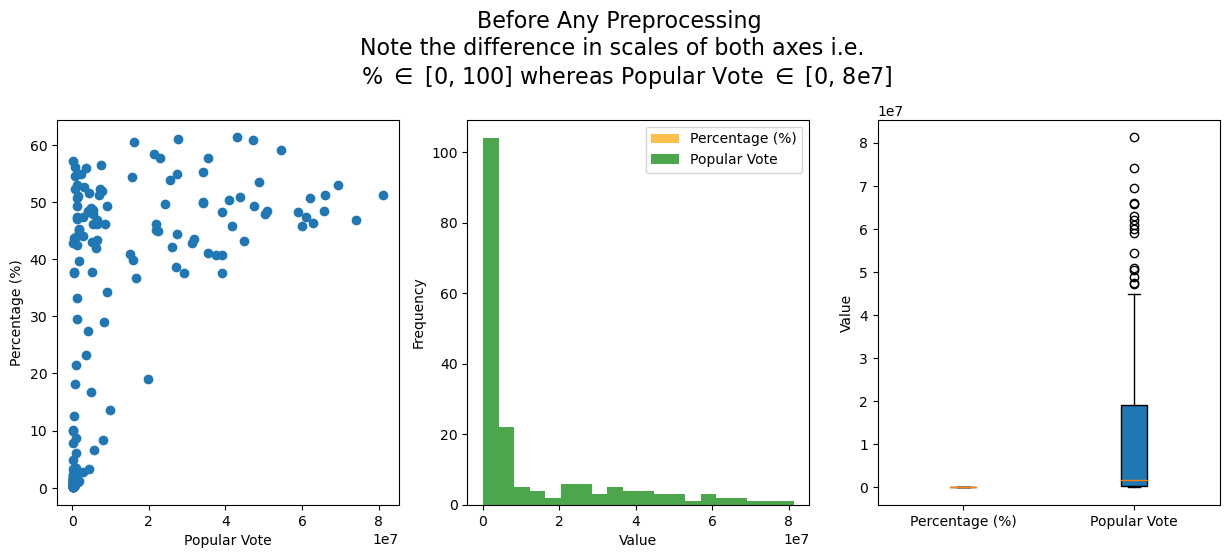

In [74]:
from matplotlib import pyplot as plt 

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(elections['Popular vote'], elections['%']);
axs[0].set_xlabel('Popular Vote');
axs[0].set_ylabel('Percentage (%)');
# axs[0].set_title('');

axs[1].hist(elections['%'], bins=20, color='orange', alpha=0.7, label='Percentage (%)');
axs[1].hist(elections['Popular vote'], bins=20, color='green', alpha=0.7, label='Popular Vote');
axs[1].set_xlabel('Value');
axs[1].set_ylabel('Frequency');
# axs[1].set_title('Note the difference in distributions of both features');
axs[1].legend();

axs[2].boxplot([elections['%'], elections['Popular vote']], vert=True, patch_artist=True, labels=['Percentage (%)', 'Popular Vote']);
axs[2].set_ylabel('Value');
# axs[2].set_title('Note the difference in scales of both features');

fig.suptitle('Before Any Preprocessing\nNote the difference in scales of both axes i.e.  \n  % $\in$ [0, 100] whereas Popular Vote $\in$ [0, 8e7]', fontsize=16, y=1.1);

# Min-Max Normalization

Feature scaling is a technique used to standardize the range of independent variables or features of data.

For instance, consider a dataset with two features: age (ranging from 0 to 100) and income (ranging from 0 to 1,000,000).

If we do not scale these features, a machine learning algorithm may give disproportionate attention to the income feature due to its larger range.

In order to address this issue, we can apply normalization techniques such as Min-Max Normalization.

Min-Max Normalization scales the data to a fixed range, usually [0, 1]. The formula for Min-Max Normalization is:

$$ X_{norm} = \frac{X - \text{min}(X)}{\text{max}(X) - \text{min}(X)}$$

Where:

- $X$ is the original column vector. 
- $X_{norm}$ is the normalized column vector.
-  $\text{min}(X)$ is the minimum value (scalar) of the $X$.
-  $\text{max}(X)$ is also the maximum value (scalar) of the $X$.


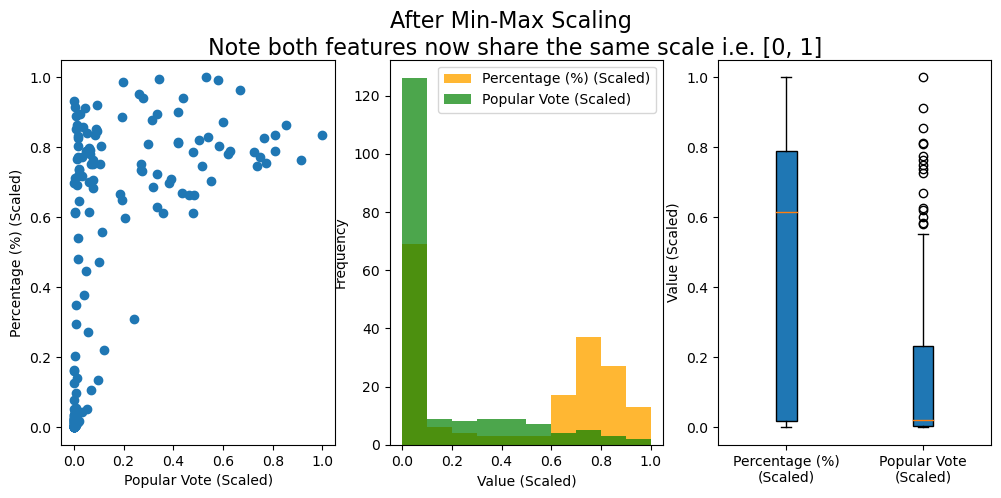

In [80]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the 'total_votes' column
elections['Popular vote scaled'] = scaler.fit_transform(elections[['Popular vote']])
elections['% scaled'] = scaler.fit_transform(elections[['%']])


# Display the first few rows of the updated DataFrame
axs[0].scatter(elections['Popular vote scaled'], elections['% scaled']);
axs[0].set_xlabel('Popular Vote (Scaled)');
axs[0].set_ylabel('Percentage (%) (Scaled)');
# axs[0].set_title('After Min-Max Scaling\n\n Note both axes now share the same scale i.e.  \n  % $\in$ [0, 1] and Popular Vote $\in$ [0, 1]');

axs[1].hist(elections['% scaled'], bins=10, color='orange', alpha=0.8, label='Percentage (%) (Scaled)');
axs[1].hist(elections['Popular vote scaled'], bins=10, color='green', alpha=0.7, label='Popular Vote (Scaled)');
axs[1].set_xlabel('Value (Scaled)');
axs[1].set_ylabel('Frequency');
axs[1].legend();

axs[2].boxplot([elections['% scaled'], elections['Popular vote scaled']], vert=True, patch_artist=True, labels=['Percentage (%)\n(Scaled)', 'Popular Vote\n(Scaled)']);
axs[2].set_ylabel('Value (Scaled)');
fig.suptitle('After Min-Max Scaling\n Note both features now share the same scale i.e. [0, 1]', fontsize=16);

# Z-Scores Standardization

Commonly used in machine learning, standardization transforms the data to have a mean of 0 and a standard deviation of 1.

The formula for Z-Score Standardization is:

$$ Z = \frac{X - \mu}{\sigma} $$

Where:

- $X$ is the original column vector.
- $Z$ is the standardized column vector.
- $\mu$ is the mean of the feature.
- $\sigma$ is the standard deviation of the feature.


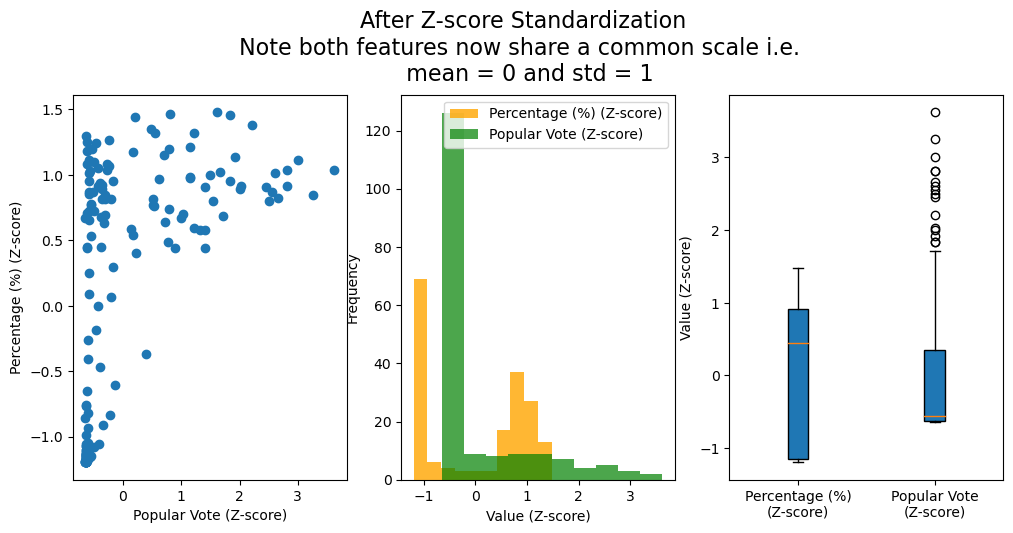

In [96]:
#import z-score 
from sklearn.preprocessing import StandardScaler

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the 'total_votes' column
elections['Popular vote zscore'] = scaler.fit_transform(elections[['Popular vote']])
elections['% zscore'] = scaler.fit_transform(elections[['%']])

# Display the first few rows of the updated DataFrame
axs[0].scatter(elections['Popular vote zscore'], elections['% zscore']);
axs[0].set_xlabel('Popular Vote (Z-score)');
axs[0].set_ylabel('Percentage (%) (Z-score)');
# axs[0].set_title('Note both axes now share a common scale i.e.  \n  mean = 0 and std = 1');

axs[1].hist(elections['% zscore'], bins=10, color='orange', alpha=0.8, label='Percentage (%) (Z-score)');
axs[1].hist(elections['Popular vote zscore'], bins=10, color='green', alpha=0.7, label='Popular Vote (Z-score)');
axs[1].set_xlabel('Value (Z-score)');
axs[1].set_ylabel('Frequency');
axs[1].set_title('');
axs[1].legend();

axs[2].boxplot([elections['% zscore'], elections['Popular vote zscore']], vert=True, patch_artist=True, labels=['Percentage (%)\n(Z-score)', 'Popular Vote\n(Z-score)']);
axs[2].set_ylabel('Value (Z-score)');
fig.suptitle('After Z-score Standardization\n Note both features now share a common scale i.e.  \n  mean = 0 and std = 1', fontsize=16, y=1.05);

# When Should You Use Each Technique?

- Use Min-Max Normalization when the data does not follow a Gaussian distribution (bell curve) and when you want to bound the values within a specific range.

    Note that if you have extreme outliers in your data, Min-Max Normalization will not be effective, as the outliers will skew the min and max values, leading to a compressed range for the majority of the data points.

- Use Z-Score Standardization when the data follows a Gaussian distribution (bell curve) or when you want to center the data around the mean with a standard deviation of 1.

    When your data contains outliers, Z-Score Standardization is generally more robust than Min-Max Normalization, as it focuses on the mean and standard deviation rather than the extreme values.

<center><img src="https://opensearch.org/wp-content/uploads/2025/04/blogpost3.png" alt="Normalization vs Standardization" width="70%"></center>

